# Dataset

Predict Bitcoin price for next 30 days

In [47]:
#import libraries
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout,Flatten
import numpy as np
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
import seaborn as sns
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.linear_model import LinearRegression
import numpy as dragon
from sklearn.metrics import mean_squared_error
from binance.client import Client
import datetime
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import deque
import random
import pandas as pd
from collections import deque
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM,BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint, ModelCheckpoint
import time
from sklearn import preprocessing


from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

using BINANCE Exchange API for getting the dataset

In [48]:
api_key='kikMm5wCFBWPs8i6apOEPBopkfCMDFqhWaonzOrFjtUyZoVb0Zimj2KN5k3JN4L3'
api_secret='7oRcw5SiuSYSVUXWELkKZomLQ6UQFfAsuYWxOVbmnKTulxUxZMCUCtmQ0RwlWW42'
client = Client(api_key, api_secret)

Fetching dataset for top three cryptocurrency: Bitcoin,Ripple and Ethereum

In [49]:
#Bitcoin
symbol='BTCUSDT'
BTC=client.get_historical_klines(symbol=symbol,interval=Client.KLINE_INTERVAL_1MINUTE,start_str="48 hours ago UTC")
#Ripple
symbol='XRPUSDT'
RIP=client.get_historical_klines(symbol=symbol,interval=Client.KLINE_INTERVAL_1MINUTE,start_str="48 hours ago UTC")
#Ethereum
symbol='ETHUSDT'
ETH=client.get_historical_klines(symbol=symbol,interval=Client.KLINE_INTERVAL_1MINUTE,start_str="48 hours ago UTC")

adding columns to the dataset

In [50]:
BTC=pd.DataFrame(BTC,columns=['Open time','Open','High','Low','Close','Volume','Close time','Quote asset volume','Number of trades','Taker buy base asset volume','Taker buy quote asset volume','Can be ignored'])
RIP=pd.DataFrame(RIP,columns=['Open time','Open','High','Low','Close','Volume','Close time','Quote asset volume','Number of trades','Taker buy base asset volume','Taker buy quote asset volume','Can be ignored'])
ETH=pd.DataFrame(ETH,columns=['Open time','Open','High','Low','Close','Volume','Close time','Quote asset volume','Number of trades','Taker buy base asset volume','Taker buy quote asset volume','Can be ignored'])

Shape of the dataset

In [51]:
print("Shape of the dataset:",BTC.shape)
print("Shape of the dataset:",RIP.shape)
print("Shape of the dataset:",ETH.shape)

Shape of the dataset: (2880, 12)
Shape of the dataset: (2880, 12)
Shape of the dataset: (2880, 12)


Datatypes information

In [52]:
print("BTC Datatypes:")
print(BTC.dtypes)

BTC Datatypes:
Open time                        int64
Open                            object
High                            object
Low                             object
Close                           object
Volume                          object
Close time                       int64
Quote asset volume              object
Number of trades                 int64
Taker buy base asset volume     object
Taker buy quote asset volume    object
Can be ignored                  object
dtype: object


Open time and close time was converted to date-time format from String 

In [53]:
BTC['Open time']=pd.to_datetime(BTC['Open time'],unit='ms')
BTC['Close time']=pd.to_datetime(BTC['Close time'],unit='ms')
RIP['Open time']=pd.to_datetime(RIP['Open time'],unit='ms')
RIP['Close time']=pd.to_datetime(RIP['Close time'],unit='ms')
ETH['Open time']=pd.to_datetime(ETH['Open time'],unit='ms')
ETH['Close time']=pd.to_datetime(ETH['Close time'],unit='ms')

Close price and volume traded are converted to float

In [54]:
BTC['Close']=BTC['Close'].astype(float)
BTC['Volume']=BTC['Volume'].astype(float)
BTC['Open']=BTC['Open'].astype(float)
BTC['High']=BTC['High'].astype(float)
BTC['Low']=BTC['Low'].astype(float)
RIP['Close']=RIP['Close'].astype(float)
RIP['Volume']=RIP['Volume'].astype(float)
RIP['Open']=RIP['Open'].astype(float)
RIP['High']=RIP['High'].astype(float)
RIP['Low']=RIP['Low'].astype(float)
ETH['Close']=ETH['Close'].astype(float)
ETH['Volume']=ETH['Volume'].astype(float)
ETH['Open']=ETH['Open'].astype(float)
ETH['High']=ETH['High'].astype(float)
ETH['Low']=ETH['Low'].astype(float)

Statistics of each cyptocurrency

In [55]:
print("BTC statistics:")
print(BTC.describe())
print("RIP statistics:")
print(RIP.describe())
print("ETH statistics:")
print(ETH.describe())

BTC statistics:
              Open         High          Low        Close       Volume  \
count  2880.000000  2880.000000  2880.000000  2880.000000  2880.000000   
mean   9437.659715  9444.646156  9430.269743  9437.879031    86.140169   
std     259.644820   260.725957   258.088079   259.495001   125.520533   
min    8896.210000  8898.330000  8891.270000  8896.160000     5.864578   
25%    9284.422500  9290.857500  9276.565000  9284.590000    31.093933   
50%    9485.935000  9492.790000  9475.410000  9485.895000    52.062375   
75%    9664.092500  9672.872500  9655.882500  9663.930000    93.964963   
max    9931.780000  9939.000000  9892.330000  9930.020000  2637.704045   

       Number of trades  
count       2880.000000  
mean         789.835417  
std          834.920321  
min          114.000000  
25%          404.000000  
50%          575.000000  
75%          885.000000  
max        14958.000000  
RIP statistics:
              Open         High          Low        Close        Vo

Checking for missing values

In [56]:
print("BTC Missing Details:")
print(BTC.isnull().any())
print("RIP Missing Details:")
print(RIP.isnull().any())
print("ETH Missing Details:")
print(ETH.isnull().any())

BTC Missing Details:
Open time                       False
Open                            False
High                            False
Low                             False
Close                           False
Volume                          False
Close time                      False
Quote asset volume              False
Number of trades                False
Taker buy base asset volume     False
Taker buy quote asset volume    False
Can be ignored                  False
dtype: bool
RIP Missing Details:
Open time                       False
Open                            False
High                            False
Low                             False
Close                           False
Volume                          False
Close time                      False
Quote asset volume              False
Number of trades                False
Taker buy base asset volume     False
Taker buy quote asset volume    False
Can be ignored                  False
dtype: bool
ETH Missing Details:
O

In [57]:
#BTC.set_index('Open time',inplace=True)

Visualizations

Text(0, 0.5, 'Close Price')

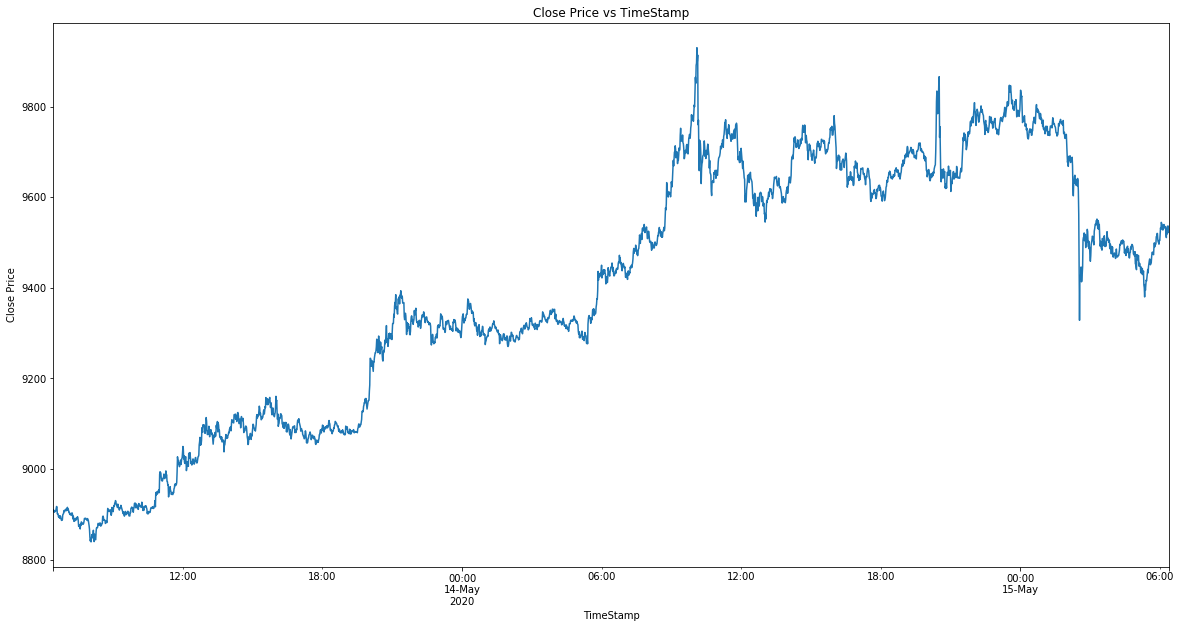

In [163]:
BTC['Close'].plot(figsize=(20,10),title='Close Price vs TimeStamp')
plt.xlabel('TimeStamp') 
plt.ylabel('Close Price') 

Additive Close=Trends+Seasonal+Residual


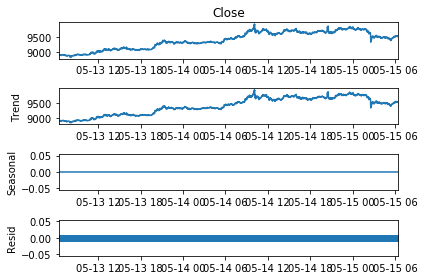

Multplicative Close= Trends*Seasonal*Residual


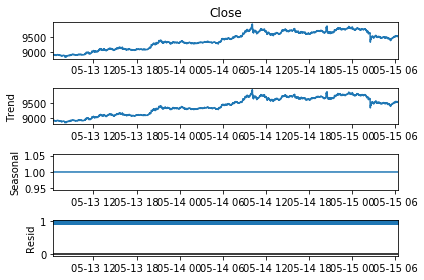

In [164]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

series=BTC['Close']

print("Additive Close=Trends+Seasonal+Residual")
result = seasonal_decompose(series, model='additive', period=1)
result.plot()
pyplot.show()

print("Multplicative Close= Trends*Seasonal*Residual")
result = seasonal_decompose(series, model='multiplicative', period=1)
result.plot()
pyplot.show()

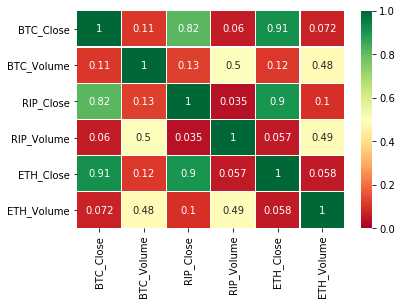

In [60]:
sns.heatmap(combined_df.corr(), annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0)

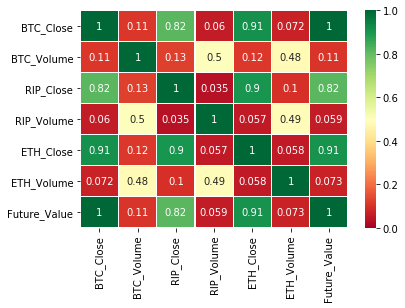

In [62]:
sns.heatmap(combined_df.corr(), annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0)

In [166]:
autocorrelation_plot(series)

preprocessing

In [58]:
combined_df = pd.DataFrame()
currencies = ["BTC","RIP","ETH"] 
datasets = [BTC,RIP,ETH]
for i in range(len(currencies)):
    currency=currencies[i]
    df=datasets[i]
    df.rename(columns={"Close": f"{currency}_Close", "Volume": f"{currency}_Volume"}, inplace=True)
    df.set_index("Open time", inplace=True)
    df = df[[f"{currency}_Close", f"{currency}_Volume"]]
    if len(combined_df)==0:
        combined_df=df
    else:  # otherwise, join this data to the main one
        combined_df=combined_df.join(df)
combined_df.fillna(method="ffill", inplace=True) # missing values filled with the previously known values

In [59]:
print("Combined_DF")
combined_df.head()

Combined_DF


BTC_Close  BTC_Volume  RIP_Close  RIP_Volume  ETH_Close  \
Open time                                                                      
2020-05-13 09:14:00    8914.35   45.865723    0.19777     35541.0     190.08   
2020-05-13 09:15:00    8913.73   20.362897    0.19789     70946.9     190.14   
2020-05-13 09:16:00    8909.54   17.153114    0.19789     64744.9     190.06   
2020-05-13 09:17:00    8912.26   49.515927    0.19795     68784.9     190.14   
2020-05-13 09:18:00    8915.19   14.984163    0.19794     76124.2     190.21   

                     ETH_Volume  
Open time                        
2020-05-13 09:14:00    99.93883  
2020-05-13 09:15:00   191.81438  
2020-05-13 09:16:00   209.40006  
2020-05-13 09:17:00  1114.79436  
2020-05-13 09:18:00   318.87290

In [61]:
future_timeline=1 # to what we want to predict short term or long term 
currency="BTC" # which cryptocurrency we are predicting
combined_df['Future_Value']=combined_df[f'{currency}_Close'].shift(-future_timeline)

standaridzation and normalization

In [15]:
def preprocess(df):

    for col in df.columns:  # go through all of the columns
        if col != "Future_Value":  # normalize all ... except for the target itself!
            df[col] = df[col].pct_change()  # pct change "normalizes" the different currencies (each crypto coin has vastly diff values, we're really more interested in the other coin's movements)
            df = df.replace([np.inf, -np.inf], np.nan)
            df.dropna(inplace=True,axis=0)  # remove the nas created by pct_change
            df[col] = preprocessing.scale(df[col].values)  

    df.dropna(inplace=True)  # cleanup again... jic.
    return df

combined_df=preprocess(combined_df)

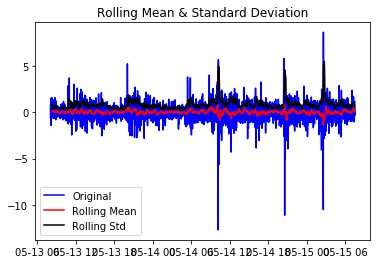

ADF Stastistic: -9.740693
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.433 
	5%: -2.863 
	10%: -2.567 


In [16]:
def test_stationarity(x):
    rolmean = x.rolling(window=22,center=False).mean()
    rolstd = x.rolling(window=12,center=False).std()
    
    #Plot rolling statistics:
    orig = plt.plot(x, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey Fuller test    
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is non stationery")
            break
         else:
            print("The graph is stationery")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))
        
ts = combined_df['BTC_Close']      
test_stationarity(ts)

spliting into train and validation

In [17]:
times=sorted(combined_df.index.values)
last_5pct=sorted(combined_df.index.values)[-int(0.05*len(times))]
validation_df = combined_df[(combined_df.index >= last_5pct)]  # make the validation data where the index is in the last 5%
train_df = combined_df[(combined_df.index < last_5pct)]  

In [18]:
print("Length validation dataset:",len(validation_df))
print("Length train dataset:",len(train_df))

Length validation dataset: 142
Length train dataset: 2702


Getting features for predcitions

In [19]:
feature_length=60  # next 1 min predcition for based on last 1 hour
future_timeline=30 

In [20]:
def features(df):
    sequential_data=[]
    index=[]
    count=0
    prev_days = deque(maxlen=feature_length)
    for i in df.values:
        prev_days.append([n for n in i[:-1]])
        if len(prev_days)==feature_length:
            sequential_data.append([np.array(prev_days), i[-1]]) 
            index.append(df.index.values[count])
        count=count+1
            

    random.shuffle(sequential_data)
    X = []
    y = []
    #print(sequential_data)
    for seq, target in sequential_data:
        X.append(seq)
        y.append(target)
    return np.array(X), y,index

train_x, train_y,index_train=features(train_df) 
validation_x, validation_y,index_validation=features(validation_df)

In [21]:
print((validation_x.shape))

(83, 60, 6)


In [22]:
train_x_NN=train_x
validation_x_NN=validation_x
train_y_NN= np.array(train_y) 
validation_y_NN= np.array(validation_y) 

In [23]:
train_x=train_x.reshape(len(train_x),360)
validation_x=validation_x.reshape(len(validation_x),360)

Model

In [24]:
#RBF +Constant kernel
np.random.seed(1)
kernel = C(1.0, (1e-3, 1e3)) * RBF(1, (1e-2, 1e2)) 
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gp.fit(train_x, train_y)
print("GPML kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))
y_pred, sigma = gp.predict(validation_x, return_std=True)
print("Value at Test points",y_pred)
print("Original Value at Test points:",validation_y)
print("Confidenne at Test point predictions ",1.9600 * sigma)
rms = sqrt(mean_squared_error(validation_y, y_pred))
print("RMSE is:",rms)

GPML kernel: 31.6**2 * RBF(length_scale=24.5)
Log-marginal-likelihood: -7103972.133
Value at Test points [8276.34461623 8383.3545317  9543.27501781 9314.26671065 8278.5704306
 8156.2397677  8277.1607958  8245.00592172 9371.66653353 8286.67083053
 8365.92198197 8720.05508713 9426.62259282 8701.15029594 8194.26699468
 8202.27740815 8125.14296196 8179.13241671 8141.37241919 9212.28121732
 8695.10243651 8253.52173472 9381.79827086 8695.46866804 8646.35672484
 8303.07772827 8690.05007893 9233.07273726 8941.42520349 8849.22855527
 8225.05076292 8619.91444651 8464.66214876 8359.50313584 8512.70386617
 8306.2349904  8334.05749772 8138.87034028 8661.46579626 8797.87409787
 8664.29934046 8222.26635301 8889.16434853 9326.31382266 8373.64861736
 8373.8475727  8097.92339133 8186.76361077 8767.45318967 9370.39298534
 8241.76398035 8742.19294742 9443.91089377 8896.12489933 9182.92874295
 8367.7087206  9322.45652127 8328.02976245 8393.3059767  8370.41545824
 9182.69954339 9425.20648981 9339.90132839 9

In [25]:
#Matern+Constant kernel
from sklearn.gaussian_process.kernels import Matern
np.random.seed(1)
kernel = C(1.0, (1e-3, 1e3)) * Matern(length_scale=1.0, nu=1.5) 
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gp.fit(train_x, train_y)
print("GPML kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))
y_pred, sigma = gp.predict(validation_x, return_std=True)
print("Value at Test points",y_pred)
print("Original Value at Test points:",validation_y)
print("Confidenne at Test point predictions ",1.9600 * sigma)
rms = sqrt(mean_squared_error(validation_y, y_pred))
print("RMSE is:",rms)

GPML kernel: 31.6**2 * Matern(length_scale=26.9, nu=1.5)
Log-marginal-likelihood: -852914.343
Value at Test points [9210.38731954 9309.84160423 9506.25069957 9501.10456138 9188.95263961
 9189.48566306 9289.49419807 9183.53863691 9469.64780075 9249.81642892
 9317.44136559 9396.01683902 9488.09290625 9387.60983729 9202.44998131
 9263.86874058 9220.72613007 9211.53133893 9221.73348475 9508.47213804
 9332.07541599 9242.63077699 9462.63897565 9374.38488177 9343.00597064
 9213.35752173 9383.6607279  9481.25967449 9454.14002832 9404.12692458
 9202.48918194 9360.39493442 9307.08285325 9327.61579473 9323.68110441
 9213.25492649 9208.91995628 9202.83288469 9362.34611265 9342.59352189
 9376.69423712 9200.71677371 9436.55637234 9338.45278202 9256.63019316
 9227.2682715  9209.47520234 9205.12131335 9380.49024715 9455.75275188
 9174.01743574 9403.52543244 9520.80439191 9449.42399503 9486.39011413
 9240.06512567 9517.21894073 9322.77729773 9299.16462027 9284.34833535
 9491.8268543  9464.58455998 9495

In [26]:
#DOT Product+Mattern Kernel
from sklearn.gaussian_process.kernels import DotProduct
np.random.seed(1)
kernel = C(1.0, (1e-3, 1e3)) * DotProduct() 
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gp.fit(train_x, train_y)
print("GPML kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))
y_pred, sigma = gp.predict(validation_x, return_std=True)
print("Value at Test points",y_pred)
print("Original Value at Test points:",validation_y)
print("Confidenne at Test point predictions ",1.9600 * sigma)
rms = sqrt(mean_squared_error(validation_y, y_pred))
print("RMSE is:",rms)

GPML kernel: 0.0382**2 * DotProduct(sigma_0=50.7)
Log-marginal-likelihood: -851012321401047168.000
Value at Test points [9434.1953125  9381.734375   9464.2734375  9376.76171875 9406.7265625
 9450.34765625 9551.57421875 9414.95898438 9384.70703125 9410.99414062
 9345.68945312 9205.55859375 9422.38085938 9212.03515625 9417.4765625
 9517.37695312 9456.92773438 9439.765625   9471.04296875 9508.39453125
 9171.00585938 9507.06054688 9372.83203125 9252.10546875 9206.9609375
 9421.00195312 9238.44140625 9496.4140625  9282.95898438 9289.90234375
 9436.20703125 9328.890625   9406.41015625 9381.47070312 9336.0390625
 9429.49023438 9467.43945312 9438.96484375 9212.97265625 9178.24023438
 9260.13671875 9491.44335938 9293.18359375 9445.69140625 9417.6640625
 9451.40820312 9450.39453125 9495.83984375 9169.73242188 9375.328125
 9455.58789062 9189.83203125 9490.92773438 9302.21289062 9493.3125
 9414.25195312 9431.62890625 9372.96484375 9399.93164062 9335.5546875
 9484.94140625 9409.71875    9429.011718

/opt/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:362: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


In [27]:
#Constant+Rational Quadratic Kernels
from sklearn.gaussian_process.kernels import Matern,RationalQuadratic
np.random.seed(1)
kernel = C(1.0, (1e-3, 1e3)) * RationalQuadratic(length_scale=1.0, alpha=1.5)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gp.fit(train_x, train_y)
print("GPML kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))
y_pred, sigma = gp.predict(validation_x, return_std=True)
print("Value at Test points",y_pred)
print("Original Value at Test points:",validation_y)
print("Confidenne at Test point predictions ",1.9600 * sigma)
rms = sqrt(mean_squared_error(validation_y, y_pred))
print("RMSE is:",rms)

GPML kernel: 31.6**2 * RationalQuadratic(alpha=0.0267, length_scale=1e-05)
Log-marginal-likelihood: -276210.700
Value at Test points [9419.78177383 9420.17478413 9439.97589147 9437.14886472 9417.38599066
 9416.44118372 9423.28115974 9418.19161757 9437.41160834 9418.27716474
 9418.74650016 9412.08180908 9436.27887813 9412.66535344 9417.57192059
 9421.80150408 9420.2244419  9418.87021295 9419.77034518 9435.53500103
 9412.06890041 9420.42253823 9434.36271629 9415.23851223 9415.19130225
 9418.15925004 9414.32734473 9434.89254993 9428.74169823 9424.88420021
 9418.58585841 9419.45374667 9420.89184845 9422.07079695 9418.25228872
 9418.66455303 9417.65735337 9418.97592256 9416.25887556 9413.31526564
 9414.57359044 9418.14956566 9426.69581586 9409.9678409  9418.69273774
 9419.34487835 9419.69753129 9420.03790448 9414.17035474 9434.91814267
 9416.8171711  9414.65058926 9440.8079953  9429.18245822 9436.20642208
 9418.38799822 9437.29946065 9422.18241966 9420.30311391 9416.97015969
 9436.25063646 

In [237]:
def plot(X,plot1,plot2):#the plotting fucntion in general
    Xi = list(range(len(X)))
    plt.xticks(Xi, X)
    plt.plot(Xi,plot1,marker='o',markersize=5,label = "Actual") 
    plt.plot(Xi,plot2,marker='o',markersize=5,label = "Predicted") 
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.title("Time vs Close price") 
    plt.legend()
    plt.show()

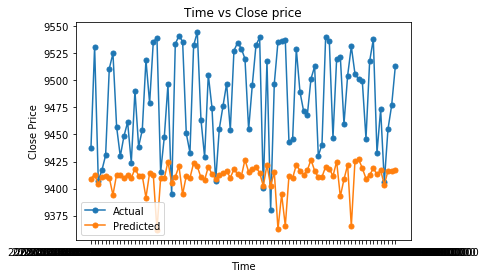

In [238]:
predicted_df=pd.DataFrame(index=index_validation)
predicted_df['Predicted_Future_Value']=y_pred
actual_df=pd.DataFrame(index=index_validation)
actual_df['Future_Value']=validation_y
plot(predicted_df.index.values,actual_df['Future_Value'],predicted_df['Predicted_Future_Value'])

In [217]:
def lighten_color(color, amount=0.5):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

Text(0, 0.5, '$f(x)$')

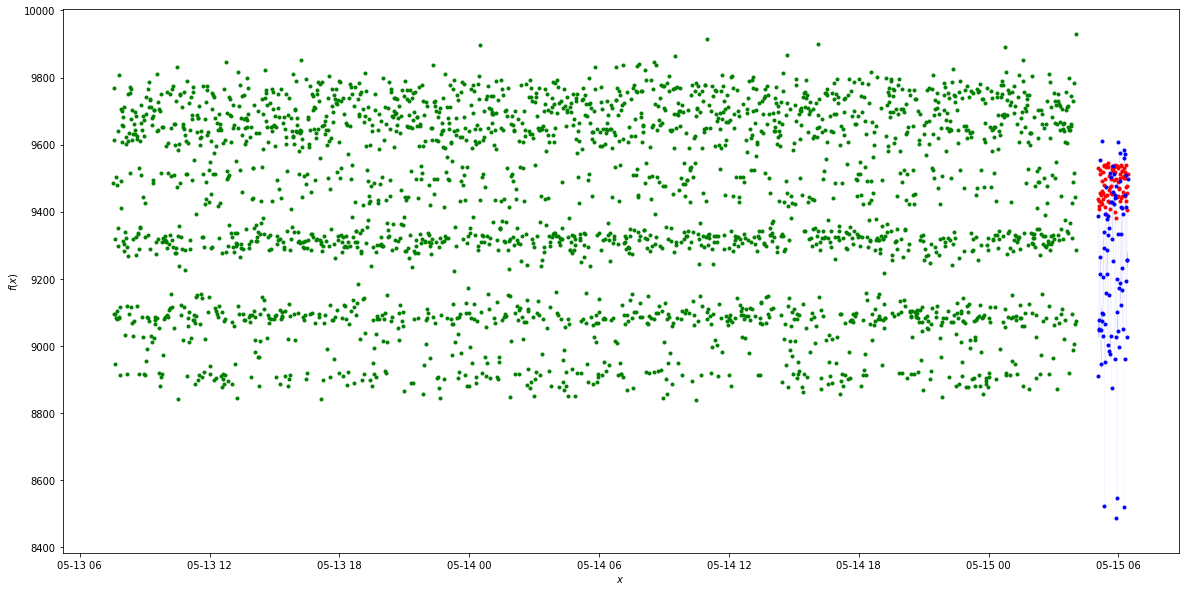

In [221]:
plt.figure(figsize=(20,10))
plt.plot(index_train,train_y,"g.", label='Observations')
plt.plot(index_validation, validation_y, 'r.', label='Prediction')
plt.plot(index_validation, y_pred, 'b.', label='Prediction')
plt.fill(np.concatenate([index_validation, index_validation[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')

plt.xlabel('$x$')
plt.ylabel('$f(x)$')
#plt.ylim(-10, 20)
#plt.legend(loc='upper left')

Other Models

In [28]:
#LINEAR + RIDGE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

lr = LinearRegression()
lr.fit(train_x, train_y)

rr = Ridge(alpha=0.01) 
rr.fit(train_x, train_y)
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(train_x, train_y)

ll = Lasso(alpha=0.01) 
ll.fit(train_x, train_y)
ll100 = Lasso(alpha=100) #  comparison with alpha value
ll100.fit(train_x, train_y)


test_score_pred=lr.predict(validation_x)
test_score=np.sqrt(mean_squared_error(validation_y, test_score_pred))
Ridge_test_score_pred=rr.predict(validation_x)
Ridge_test_score=np.sqrt(mean_squared_error(validation_y, Ridge_test_score_pred))
Ridge_test_score100_pred=rr100.predict(validation_x)
Ridge_test_score100=np.sqrt(mean_squared_error(validation_y, Ridge_test_score100_pred))

Lasso_test_score_pred=ll.predict(validation_x)
Lasso_test_score=np.sqrt(mean_squared_error(validation_y, Lasso_test_score_pred))
Lasso_test_score100_pred=ll100.predict(validation_x)
Lasso_test_score100=np.sqrt(mean_squared_error(validation_y, Lasso_test_score100_pred))

print("linear regression test score:", test_score)
print("Ridge regression test score low alpha:", Ridge_test_score)
print("Ridge regression test score high alpha:", Ridge_test_score100)
print("Lasso regression test score low alpha:", Lasso_test_score)
print("Lasso regression test score high alpha:", Lasso_test_score100)

linear regression test score: 273.9793364490126
Ridge regression test score low alpha: 273.9793867215973
Ridge regression test score high alpha: 275.00637724627336
Lasso regression test score low alpha: 274.2316376404895
Lasso regression test score high alpha: 190.70661930301256


In [250]:
#RNN

In [29]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout,Flatten

regressor=Sequential()
#first RNN layer
regressor.add(SimpleRNN(512,activation="relu",return_sequences=True,input_shape=(train_x_NN.shape[1:])))
regressor.add(Dropout(0.25))
#second RNN layer
regressor.add(SimpleRNN(256,activation="relu",return_sequences=True))
regressor.add(Dropout(0.25))
regressor.add(SimpleRNN(512,activation="relu",return_sequences=True))
regressor.add(Dropout(0.35))
#fourth RNN layer
regressor.add(SimpleRNN(256,activation="relu",return_sequences=True))
regressor.add(Dropout(0.25))
#fifth RNN layer
regressor.add(SimpleRNN(128,activation="relu",return_sequences=True))
regressor.add(Dropout(0.25))
#convert the matrix to 1-line
regressor.add(Flatten())
#output layer
regressor.add(Dense(1))

regressor.compile(optimizer="adam",loss="mean_squared_error")
regressor.fit(train_x_NN,train_y_NN,epochs=10,batch_size=64)

predicted_data=regressor.predict(validation_x_NN)
rms=np.sqrt(mean_squared_error(validation_y_NN, predicted_data))
print("RMSE with RNN: ",rms)

Epoch 1/10
2643/2643 [==============================] - 36s 13ms/step - loss: 61619885252.5433
Epoch 2/10
2643/2643 [==============================] - 27s 10ms/step - loss: 321016523.4082
Epoch 3/10
2643/2643 [==============================] - 28s 10ms/step - loss: 51961427.7650
Epoch 4/10
2643/2643 [==============================] - 28s 11ms/step - loss: 4590041.4453
Epoch 5/10
2643/2643 [==============================] - 28s 11ms/step - loss: 1940089.7451
Epoch 6/10
2643/2643 [==============================] - 27s 10ms/step - loss: 1391530.9104
Epoch 7/10
2643/2643 [==============================] - 27s 10ms/step - loss: 1100653.5509
Epoch 8/10
2643/2643 [==============================] - 27s 10ms/step - loss: 890369.7202
Epoch 9/10
2643/2643 [==============================] - 27s 10ms/step - loss: 1127033.1636
Epoch 10/10
2643/2643 [==============================] - 27s 10ms/step - loss: 684694.2871
RMSE with RNN:  1122.4937214817687


In [63]:
from xgboost import XGBRegressor
model = XGBRegressor(objective='reg:squarederror',n_estimators=100,max_depth=5)
model.fit(train_x, train_y)
y_pred=model.predict(validation_x)
rms=np.sqrt(mean_squared_error(validation_y, y_pred))
print('Test Root Mean Squared Error in closing price:',rms)

KeyboardInterrupt: 